In [1]:
from typing import Callable
import numpy as np
import matplotlib.pyplot as plt

## OU

In [2]:

# np.random.seed(42)

def theta(a, b, t):
    return a*t + b

r_0 = 0.04
K = 0.2
sigma = .05
a = 0.01
b = 0.001
T = 100.
N = 200

In [3]:
def ou(r0, K, a, b, sigma, T, N):
    dt = T/float(N)    
    rates = [r0]
    for t in range(N):
        dr = K*(theta(a, b, t)-rates[t])*dt + sigma*np.random.normal()
        rates.append(rates[t] + dr)
    return np.linspace(0, T, N+1), rates

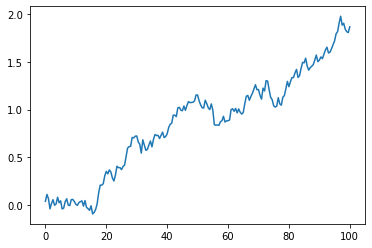

In [4]:
x, y = ou(r_0, K, a, b, sigma, T, N)

plt.plot(x,y)
plt.show()

## CIR

In [5]:
def cir(r0, K, a, b, sigma, T, N):
    dt = T/float(N)    
    rates = [r0]
    for t in range(N):
        theta_ = theta(a, b, t)
        d = 2*theta_*K / sigma**2
        if d > 1:
            c = (sigma**2)*(1 - np.exp(-K*dt)) / (4*K)
            lambda_ = rates[-1]*(np.exp(-K*dt)) / c
            z = np.random.normal()
            chi = np.random.chisquare(d-1, 1)
            rates.append(c*((z + np.sqrt(lambda_))**2) + chi)

        # else:
        #     c = (sigma**2)*(1 - np.exp(-K*dt)) / (4*K)
        #     lambda_ = rates[-1]*(np.exp(-K*dt)) / c
        #     n = np.random.poisson(lambda_/2, 1)
        #     chi = np.random.chisquare(d + 2*n, 1)
        #     rates.append(c*chi)
    return np.linspace(0, T, N+1), rates

In [6]:
r_0 = 0.04
K = 0.2
sigma = 0.1
a = 0.00001
b = -0.00001
T = 10.
N = 200

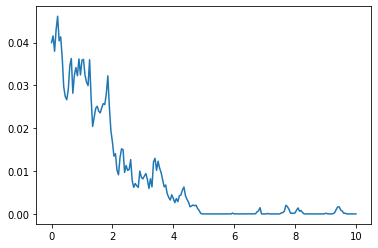

In [7]:
x, y = cir(r_0, K, a, b, sigma, T, N)

plt.plot(x, y)
plt.show()


### MLE

In [25]:
from scipy.optimize import minimize

r_0 = 0.04
K = 0.2
sigma = .05
a = 0.01
b = 0.001
T = 10.
N = 1000

def ou_optimization_log_likelihood(params):
    K = params[0]
    a = params[1]
    b = params[2]
    sigma = params[3]
    L = 0
    for t in np.arange(1, N):
        # TODO calculate mse
        dt = T/float(N)
        t = dt*t
        L += np.log(np.sqrt(2*np.pi*((1-np.exp(-2*K*t))/(2*K)))*sigma) 
        + 0.5*((r_0-r_0*np.exp(-K*t)-a*t-b-(np.exp(-K*t)*(a-K*b)-a)/K)
        /(sigma*np.sqrt((1-np.exp(-2*K*t))/(2*K))))**2
    # print(L)
    # print(f'K = {K}')
    # print(f'a = {a}')
    # print(f'b = {b}')
    # print(f'sigma = {sigma}')
    return L 

In [26]:
params = np.array([1, 1, 1, 1])
lik_model = minimize(ou_optimization_log_likelihood, params, method='Powell', options={"maxiter": 1000})
print(lik_model)
print("Target parms")
print(K, a, b, sigma)
print("MLE parms")
print(lik_model["x"])

532.1071180472424
K = 1.0
a = 1.0
b = 1.0
sigma = 1.0
532.1071180472424
K = 1.0
a = 1.0
b = 1.0
sigma = 1.0
206.26890701263397
K = 2.0
a = 1.0
b = 1.0
sigma = 1.0
-80.77856380337164
K = 3.6180339999999998
a = 1.0
b = 1.0
sigma = 1.0
-173.58780322605088
K = 4.373534967127689
a = 1.0
b = 1.0
sigma = 1.0
-294.7084230492079
K = 5.595961218973175
a = 1.0
b = 1.0
sigma = 1.0
-535.3282377886073
K = 9.108417855807376
a = 1.0
b = 1.0
sigma = 1.0
-775.9032727261206
K = 14.791692117730767
a = 1.0
b = 1.0
sigma = 1.0
-910.4159025218427
K = 19.385933832984698
a = 1.0
b = 1.0
sigma = 1.0
-1072.0358036082998
K = 26.819573132483875
a = 1.0
b = 1.0
sigma = 1.0
-1276.8942790879596
K = 40.45131678426458
a = 1.0
b = 1.0
sigma = 1.0
-1494.0147749264718
K = 62.507941492129916
a = 1.0
b = 1.0
sigma = 1.0
-1649.553610767265
K = 85.36177526242291
a = 1.0
b = 1.0
sigma = 1.0
-1829.2556636695365
K = 122.34005533310517
a = 1.0
b = 1.0
sigma = 1.0
-2018.073786408049
K = 178.5534995966392
a = 1.0
b = 1.0
sigma = 1.

/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:2392: RuntimeWarning: overflow encountered in double_scalars
  elif (w - wlim)*(wlim - xc) >= 0.0:
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: overflow encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in double_scalars
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:2365: RuntimeWarning: overflow encountered in double_scalars
  tmp2 = (xb - xc) * (fb - fa)
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/scipy/optimize/optimize.py:2371: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/scipy/optimiz

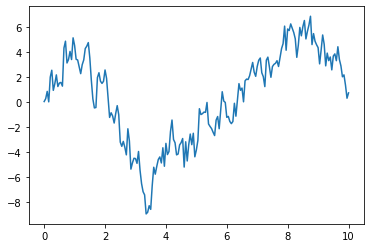

In [78]:
x, y = ou(r_0, *params, T, N)

plt.plot(x,y)
plt.show()

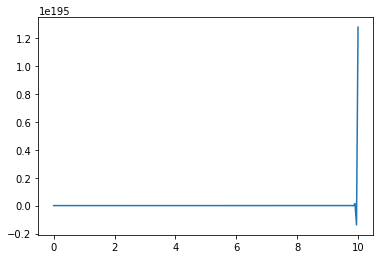

In [54]:
x, y = ou(r_0, *lik_model["x"], T, N)

plt.plot(x,y)
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error

r_0 = 0.04
true_K = 0.2
true_a = 0.01
true_b = 0.001
true_sigma = .05
T = 100.
N = 5000

def ou_optimization_mse(params):
    def next_ou(rt, K, a, b, sigma, t, T, N, dw):
        dt = T/float(N)
        dr = K*(theta(a, b, t)-rt)*dt + sigma*dw
        return rt + dr
    true_r_t = r_0
    r_t = r_0
    K = params[0]
    a = params[1]
    b = params[2]
    sigma = params[3]
    y_true = []
    y_pred = []
    for t in np.arange(1, N):
        dw = np.random.normal()
        true_r_t = next_ou(true_r_t, true_K, true_a, true_b, true_sigma, t, T, N, dw)
        r_t = next_ou(r_t, K, a, b, sigma, t, T, N, dw)
        y_true.append(true_r_t)
        y_pred.append(r_t)
    # print(mean_squared_error(y_true, y_pred))
    # print(f'K = {K}')
    # print(f'a = {a}')
    # print(f'b = {b}')
    # print(f'sigma = {sigma}')
    return mean_squared_error(y_true, y_pred)

In [53]:
params = np.array([1, 1, 1, 1])
lik_model = minimize(ou_optimization_mse, params, method='Powell', options={"maxiter": 10000, 'disp': True},)
print(lik_model)
print("Target parms")
print(true_K, true_a, true_b, true_sigma)
print("MLE parms")
print(lik_model["x"])

/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/home/ilgizar/thesis/Thesis/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
x, y = ou(r_0, *params, T, N)

plt.plot(x,y)
plt.show()

In [ ]:
x, y = ou(r_0, *lik_model["x"], T, N)

plt.plot(x,y)
plt.show()
